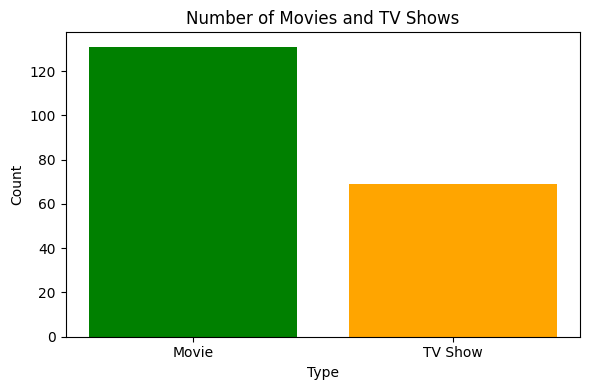

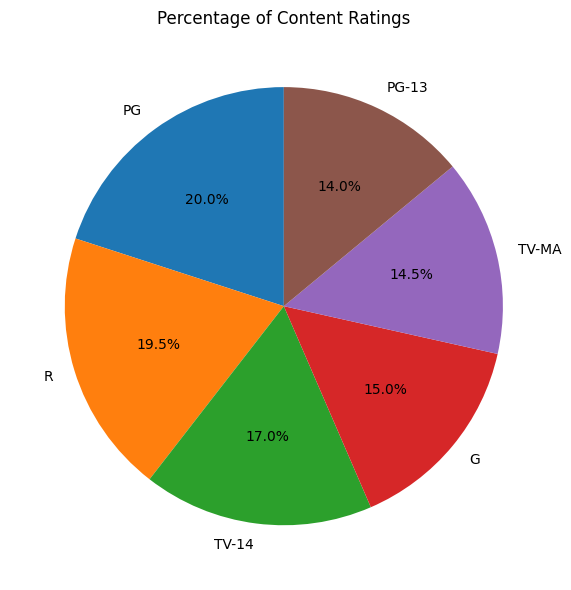

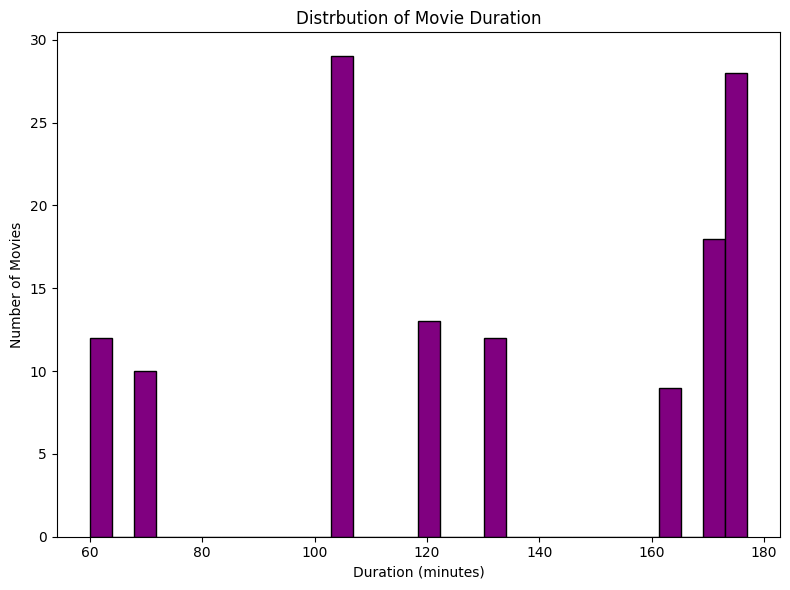

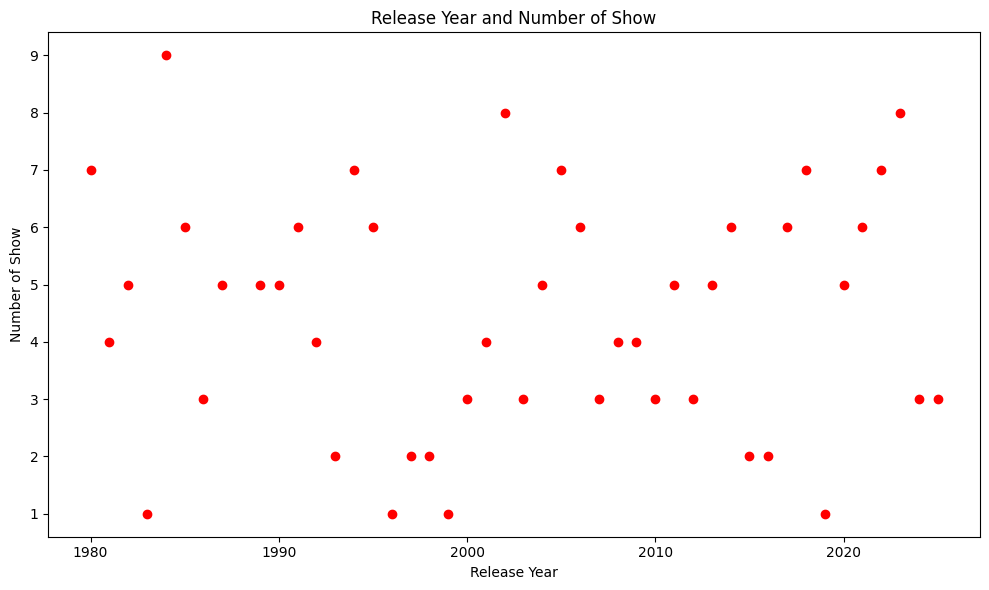

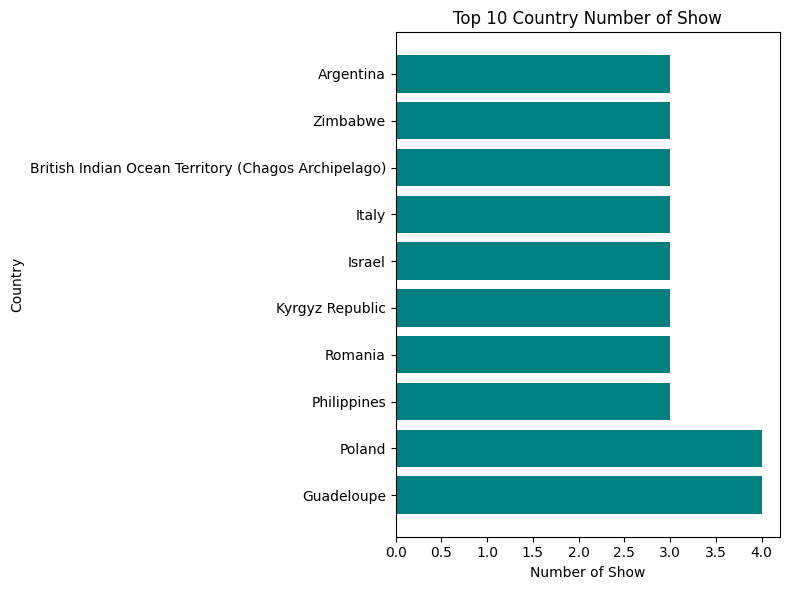

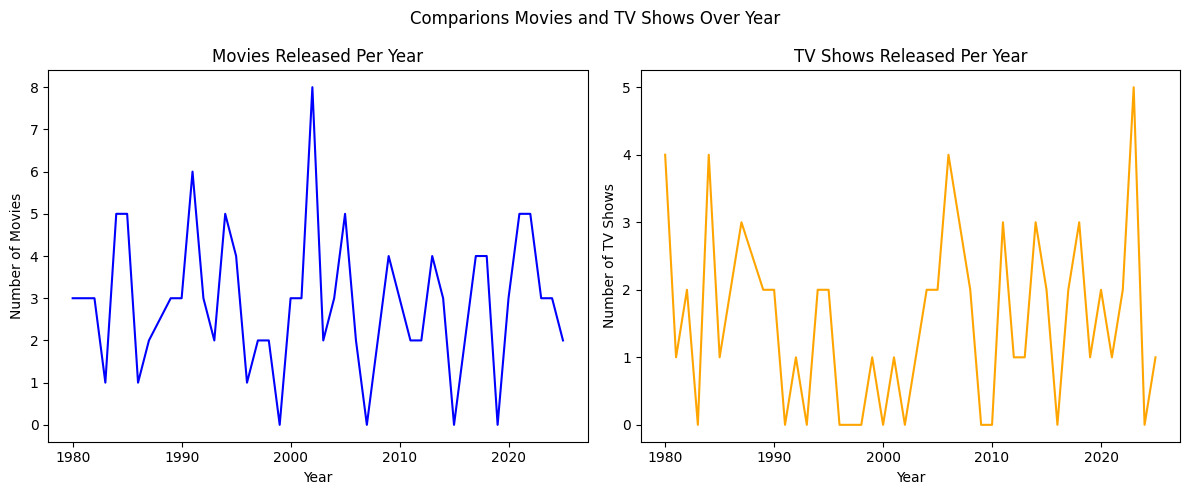

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_large_sample.csv")


df.columns = df.columns.str.strip()


df['type'] = df['duration'].apply(
    lambda x: 'Movie' if 'min' in str(x) else 'TV Show'
)


df = df.dropna(subset=['type','title','release_year','rating','country','duration'])


type_count = df['type'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(type_count.index, type_count.values, color=['green','orange'])
plt.title("Number of Movies and TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("Movies and Tv Show.png")
plt.show()


rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Content Ratings')
plt.tight_layout()
plt.savefig('Rating of Movies and Tv Show.png')
plt.show()


movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min', ' ').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor="black")
plt.title("Distrbution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.savefig("Movie_duration_in_histogram.png")
plt.show()


release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release Year and Number of Show')
plt.xlabel('Release Year')
plt.ylabel("Number of Show")
plt.tight_layout()
plt.savefig("Release Year.png")
plt.show()


country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values, color="teal")
plt.title("Top 10 Country Number of Show")
plt.xlabel("Number of Show")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig('Country_of_Show.png')
plt.show()


content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2,figsize=(12,5))

# First subplot:Movies
ax[0].plot(content_by_year.index,content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movies")

# Second subplot:TVShow
ax[1].plot(content_by_year.index,content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of TV Shows")
fig.suptitle("Comparions Movies and TV Shows Over Year")

plt.tight_layout()
plt.savefig("Movies and TV Show.png")
plt.show()

